## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

#### Import the CSV Data as Pandas DataFrame

In [6]:
df=pd.read_csv(r"data/stud.csv")

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [10]:
x= df.drop('math_score',axis=1)   #--> here we take math score as dependent column
y= df['math_score']

x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [11]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [22]:
# column transformation
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_feature=x.select_dtypes(exclude='object').columns
cat_feature= x.select_dtypes(include='object').columns

num_transform= StandardScaler()
OH_transform= OneHotEncoder()

preprocess = ColumnTransformer(transformers=
                                  [
                                    ('numeric_trasform',num_transform,num_feature),
                                    ('cat_trasform',OH_transform,cat_feature)
                                  ]
                               )



In [23]:
preprocess.fit_transform(x)

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [24]:
x= preprocess.fit_transform(x)

In [25]:
x.shape

(1000, 19)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape, x_test.shape

((800, 19), (200, 19))

### Model evaluation and prediction

In [38]:
def model_eval(actual,predict):
    R2_score= r2_score(actual,predict)
    mse= mean_squared_error(actual,predict)
    RMSE= np.sqrt(R2_score)
    MAE= mean_absolute_error(actual,predict)
    return R2_score,mse,RMSE,MAE
    

In [44]:
models= {'linear_regression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'KNN': KNeighborsRegressor(),
        'Decision_tree': DecisionTreeRegressor(),
        'RandomForest': RandomForestRegressor(),
        'Adaboost': AdaBoostRegressor(),
        'Xgboost': XGBRegressor(),
        'CatBoost': CatBoostRegressor(verbose=False)
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(x_train,y_train)   #--> Train model
    
    #predict model
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    
    #model Evaluation
    model_train_R2Score, model_train_MSE, model_train_RMSE,model_train_MAE = model_eval(y_train,y_predict_train)
    
    model_test_R2Score, model_test_MSE, model_test_RMSE,model_test_MAE = model_eval(y_test,y_predict_test)
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for Training dataset")
    print("- Root mean square error {:.4f}".format(model_train_RMSE))
    print("- mean square error {:.4f}".format(model_train_MSE))
    print("- Mean Absolute error {:.4f}".format(model_train_MAE))
    print("- R2_score {:.4f}".format(model_train_R2Score))
    
    print('-'*40)
   
    
    print("Model performance for Testing dataset")
    print("- Root mean square error {:.4f}".format(model_test_RMSE))
    print("- mean square error {:.4f}".format(model_test_MSE))
    print("- Mean Absolute error {:.4f}".format(model_test_MAE))
    print("- R2_score {:.4f}".format(model_test_R2Score))
    r2_list.append(model_test_R2Score)
    
    print('*'*40)
    print('\n')
    
    
    
    
    
    
    
    
    

linear_regression
Model performance for Training dataset
- Root mean square error 0.9350
- mean square error 28.3349
- Mean Absolute error 4.2667
- R2_score 0.8743
----------------------------------------
Model performance for Testing dataset
- Root mean square error 0.9383
- mean square error 29.0952
- Mean Absolute error 4.2148
- R2_score 0.8804
****************************************


Ridge
Model performance for Training dataset
- Root mean square error 0.9350
- mean square error 28.3378
- Mean Absolute error 4.2650
- R2_score 0.8743
----------------------------------------
Model performance for Testing dataset
- Root mean square error 0.9384
- mean square error 29.0563
- Mean Absolute error 4.2111
- R2_score 0.8806
****************************************


Lasso
Model performance for Training dataset
- Root mean square error 0.8984
- mean square error 43.4783
- Mean Absolute error 5.2063
- R2_score 0.8071
----------------------------------------
Model performance for Testing dat

In [47]:
model_score=list(zip(model_list,r2_list))
model_score

[('linear_regression', 0.8804332983749565),
 ('Ridge', 0.8805931485028737),
 ('Lasso', 0.825320079562973),
 ('KNN', 0.7837702557426202),
 ('Decision_tree', 0.7438341009885822),
 ('RandomForest', 0.8475497340957193),
 ('Adaboost', 0.8415153607712265),
 ('Xgboost', 0.8198173310440375),
 ('CatBoost', 0.8516318920747058)]

In [48]:
pd.DataFrame(model_score,columns=['Model_name','R2_Score']).sort_values(by='R2_Score',ascending=False)

,Model_name,R2_Score
1,Ridge,0.880593
0,linear_regression,0.880433
8,CatBoost,0.851632
5,RandomForest,0.847550
6,Adaboost,0.841515
2,Lasso,0.825320
7,Xgboost,0.819817
3,KNN,0.783770
4,Decision_tree,0.743834


### Linear model is performing good

In [50]:
linear_model= LinearRegression(fit_intercept=True)
linear_model= linear_model.fit(x_train,y_train)
y_pred= linear_model.predict(x_test)
score= r2_score(y_test,y_pred)

print("Accuracy of linear model %.2f" %score)


Accuracy of linear model 0.88


## Plot y_pred and y_test

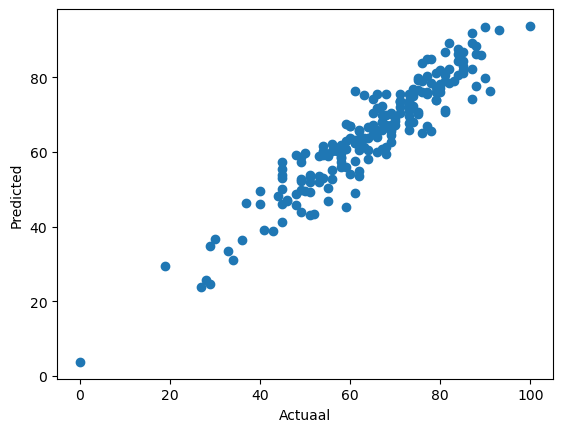

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actuaal')
plt.ylabel('Predicted')
plt.show()

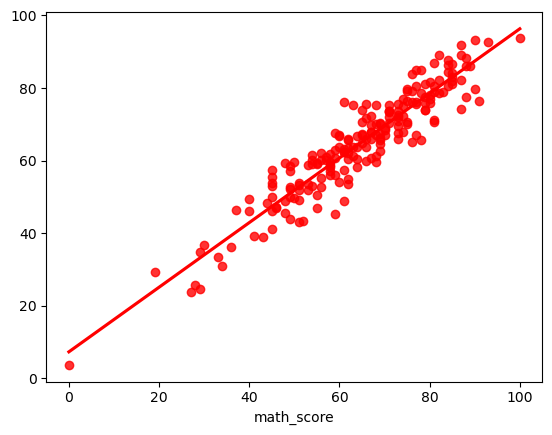

In [53]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');